In [1]:
from tqdm import tqdm
import glob
from torchvision.io import read_image, ImageReadMode
from utils import *
from models import load_model
from Relax import RELAX_All
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.gridspec as gridspec
from PIL import Image
from matplotlib import pyplot as plt
from torchvision.transforms.functional import pil_to_tensor
from torchvision.transforms import ToTensor, Normalize, Resize
from torchvision.io import read_image
import torch
import torch.nn as nn
import numpy as np
from scipy.signal import gaussian
import torchvision.transforms as transforms
import torchvision
import time
from torchvision.io import read_image


/home/yavuz/anaconda3/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

img1=imagenet_image_transforms(device='cuda', new_shape_of_image=224)(read_image('images/sample1.jpg')/255)
img2=imagenet_image_transforms(device='cuda', new_shape_of_image=224)(read_image('images/sample2.jpg')/255)
img2=imagenet_image_transforms(device='cuda', new_shape_of_image=224)(read_image('images/sample3.jpg')/255)

/home/yavuz/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [3]:
BATCH_SIZE=16
NUM_BATCH=8

In [4]:
def saliency(img,encoder):
    relax=RELAX_All(img, encoder)
    with torch.no_grad(): relax.forward()
    fig = plt.figure(figsize=(14, 4))
    ax1 = fig.add_subplot(1, 5, 1)
    im1 = ax1.imshow(imsc(img[0]))
    ax1.axis('off')
    ax1.set_title('input image')
    
    ax2 = fig.add_subplot(1, 5, 2)
    ax2.imshow(imsc(img[0]))
    im2 = plt.imshow(relax.importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax2.axis('off')
    ax2.set_title(f'importance')
    plt.colorbar(im2, fraction=0.046, pad=0.04)

    ax3 = fig.add_subplot(1, 5, 3)
    ax3.imshow(imsc(img[0]))
    im3 = plt.imshow(relax.color_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax3.axis('off')
    ax3.set_title(f'color importance')
    plt.colorbar(im3, fraction=0.046, pad=0.04)

    ax4 = fig.add_subplot(1, 5, 4)
    ax4.imshow(imsc(img[0]))
    im4 = plt.imshow(relax.shape_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax4.axis('off')
    ax4.set_title(f'shape importance')
    plt.colorbar(im4, fraction=0.046, pad=0.04)

    ax5 = fig.add_subplot(1, 5, 5)
    ax5.imshow(imsc(img[0]))
    im5 = plt.imshow(relax.texture_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax5.axis('off')
    ax5.set_title(f'texture importance')
    plt.colorbar(im5, fraction=0.046, pad=0.04)
    
    
    
    plt.savefig("importance.png")  
    plt.show()




In [5]:
def saliency_all(img,encoder1,encoder2,encoder3,encoder4):
    relax=RELAX_All(img, encoder1)
    with torch.no_grad(): relax.forward()

    fig = plt.figure(figsize=(14, 12))
    ax1 = fig.add_subplot(4, 5, 1)
    im1 = ax1.imshow(imsc(img[0]))
    ax1.axis('off')
    
    
    ax2 = fig.add_subplot(4, 5, 2)
    ax2.imshow(imsc(img[0]))
    im2 = plt.imshow(relax.importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax2.axis('off')
     

    ax3 = fig.add_subplot(4, 5, 3)
    ax3.imshow(imsc(img[0]))
    im3 = plt.imshow(relax.color_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax3.axis('off')

    ax4 = fig.add_subplot(4, 5, 4)
    ax4.imshow(imsc(img[0]))
    im4 = plt.imshow(relax.shape_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax4.axis('off')

    ax5 = fig.add_subplot(4, 5, 5)
    ax5.imshow(imsc(img[0]))
    im5 = plt.imshow(relax.texture_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax5.axis('off')

    relax=RELAX_All(img, encoder2)
    with torch.no_grad(): relax.forward()

    

    ax6 = fig.add_subplot(4, 5, 6)
    im6 = ax6.imshow(imsc(img[0]))
    ax6.axis('off')
    
    
    ax7 = fig.add_subplot(4, 5, 7)
    ax7.imshow(imsc(img[0]))
    im7 = plt.imshow(relax.importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax7.axis('off')
     

    ax8 = fig.add_subplot(4, 5, 8)
    ax8.imshow(imsc(img[0]))
    im8 = plt.imshow(relax.color_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax8.axis('off')

    ax9 = fig.add_subplot(4, 5, 9)
    ax9.imshow(imsc(img[0]))
    im9 = plt.imshow(relax.shape_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax9.axis('off')

    ax10 = fig.add_subplot(4, 5, 10)
    ax10.imshow(imsc(img[0]))
    im10 = plt.imshow(relax.texture_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax10.axis('off')

    relax=RELAX_All(img, encoder3)
    with torch.no_grad(): relax.forward()

    
    ax11 = fig.add_subplot(4, 5, 11)
    im11 = ax11.imshow(imsc(img[0]))
    ax11.axis('off')
    
    
    ax12 = fig.add_subplot(4, 5, 12)
    ax12.imshow(imsc(img[0]))
    im12 = plt.imshow(relax.importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax12.axis('off')
     

    ax13 = fig.add_subplot(4, 5, 13)
    ax13.imshow(imsc(img[0]))
    im13 = plt.imshow(relax.color_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax13.axis('off')

    ax14 = fig.add_subplot(4, 5, 14)
    ax14.imshow(imsc(img[0]))
    im14 = plt.imshow(relax.shape_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax14.axis('off')

    ax15 = fig.add_subplot(4, 5, 15)
    ax15.imshow(imsc(img[0]))
    im15 = plt.imshow(relax.texture_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax15.axis('off')


    relax=RELAX_All(img, encoder4)
    with torch.no_grad(): relax.forward()


    ax16 = fig.add_subplot(4, 5, 16)
    im16 = ax16.imshow(imsc(img[0]))
    ax16.axis('off')
    
    
    ax17 = fig.add_subplot(4, 5, 17)
    ax17.imshow(imsc(img[0]))
    im17 = plt.imshow(relax.importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax17.axis('off')
     

    ax18 = fig.add_subplot(4, 5, 18)
    ax18.imshow(imsc(img[0]))
    im18 = plt.imshow(relax.color_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax18.axis('off')

    ax19 = fig.add_subplot(4, 5, 19)
    ax19.imshow(imsc(img[0]))
    im19 = plt.imshow(relax.shape_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax19.axis('off')

    ax20 = fig.add_subplot(4, 5, 20)
    ax20.imshow(imsc(img[0]))
    im20 = plt.imshow(relax.texture_importance.numpy(force=True), alpha=0.75, cmap='jet')
    ax20.axis('off')






    timestr = time.strftime("%Y%m%d-%H%M%S")


    
    plt.savefig("importance_"+timestr+".png")  
    plt.show()




In [6]:
vicreg=load_model('path','models/VICReg.pth')
simclr=load_model('path','models/converted_vissl_simclr1000ep.torch')
supervised=load_model('supervised')
barlow=load_model('path','models/converted_vissl_barlow_twins.torch')

/home/yavuz/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yavuz/anaconda3/envs/torch/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


/home/yavuz/github/Explaining-Representation-Learning-with-Perceptual-Components/utils.py:229: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at /opt/conda/conda-bld/pytorch_1699449185072/work/torch/csrc/tensor/python_tensor.cpp:83.)
  pixel_range = torch.cuda.FloatTensor([range(pixel_count)])


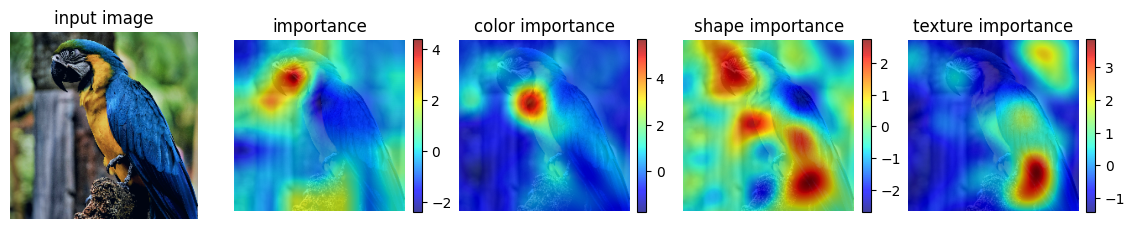

In [7]:
saliency(img1,supervised)

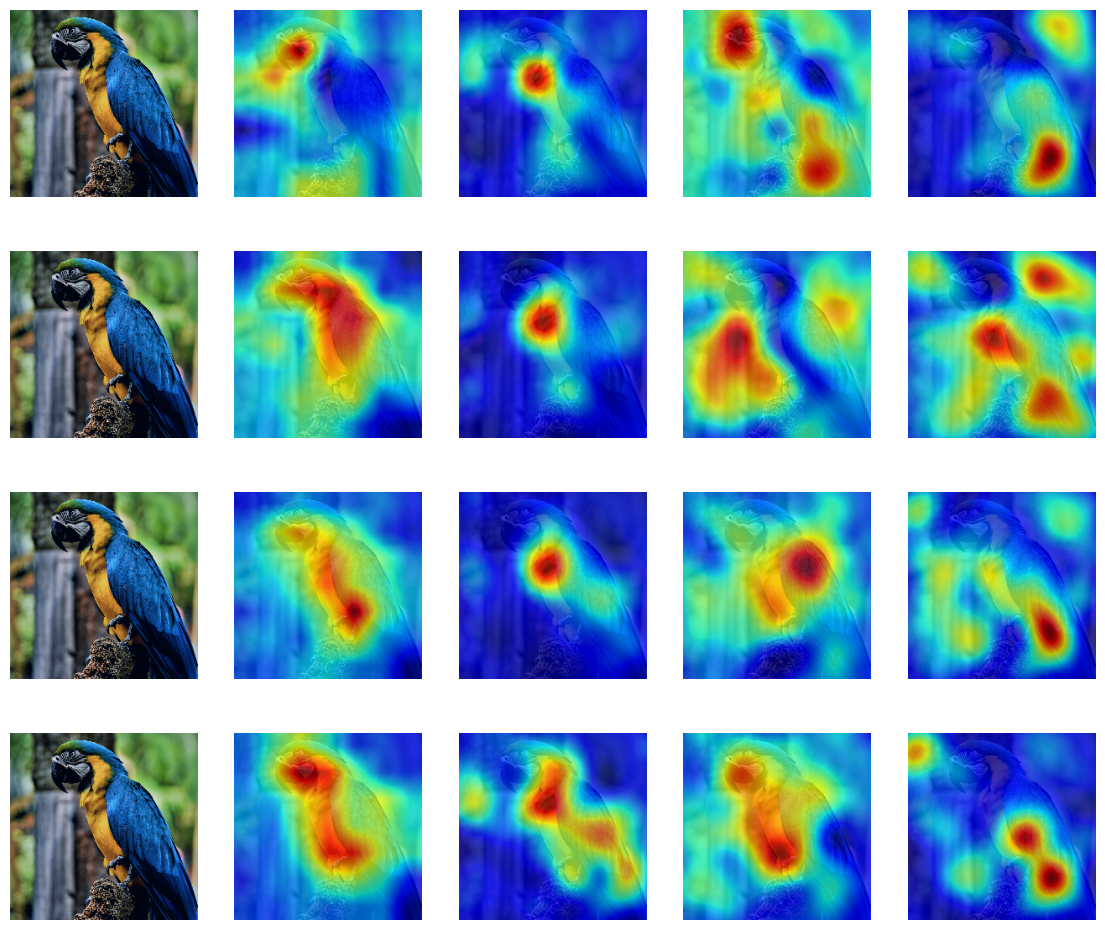

In [8]:
saliency_all(img1,supervised,simclr,barlow,vicreg)